# Number of novel species published per year (Figure 1)

In [29]:
import pandas as pd
import seaborn as sns

In [30]:
#loading table containing all names of prokaryotic species (LPSN)
#"lpsn_list_species_final.txt" was derived from lists available in http://www.bacterio.net/-allnames.html (3/1/2019)
lpsn = pd.read_csv("lpsn_list_species_final.txt", sep="\t")

In [31]:
lpsn.head(5)

,Name,Year
0,Abiotrophia adiacens,1995
1,Abiotrophia balaenopterae,1999
2,Abiotrophia defectiva,1995
3,Abiotrophia elegans,1999
4,Abyssicoccus albus,2016


In [32]:
lpsn[lpsn["Year"].isnull()]

,Name,Year


In [33]:
contagem = pd.DataFrame(lpsn["Year"].value_counts()).reset_index()

In [34]:
contagem.columns = ["Year","Freq"]
contagem.head()

,Year,Freq
0,2016,1132
1,2015,1072
2,2017,1048
3,2014,859
4,2013,759


In [35]:
contagem_sorted = contagem.sort_values(by="Year")

In [36]:
contagem_sorted.head()

,Year,Freq
143,1809,1
135,1823,1
132,1832,1
149,1833,1
146,1835,1


In [37]:
contagem_sorted.tail()

,Year,Freq
3,2014,859
1,2015,1072
0,2016,1132
2,2017,1048
10,2018,599


In [38]:
contagem_sorted["cum_sum"] = contagem_sorted["Freq"].cumsum()

In [39]:
contagem_sorted.head(20)

,Year,Freq,cum_sum
143,1809,1,1
135,1823,1,2
132,1832,1,3
149,1833,1,4
146,1835,1,5
139,1838,1,6
150,1842,1,7
134,1843,1,8
152,1844,1,9
140,1845,1,10


In [40]:
contagem_1918_2018 = contagem_sorted.tail(100)

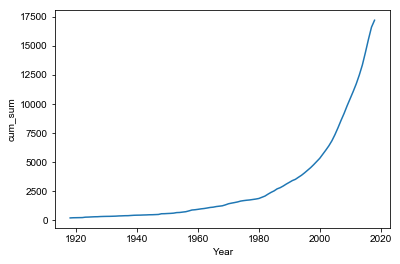

In [41]:
ax = sns.lineplot(x="Year", y="cum_sum", data=contagem_1918_2018)
#ax.set_yscale('symlog')

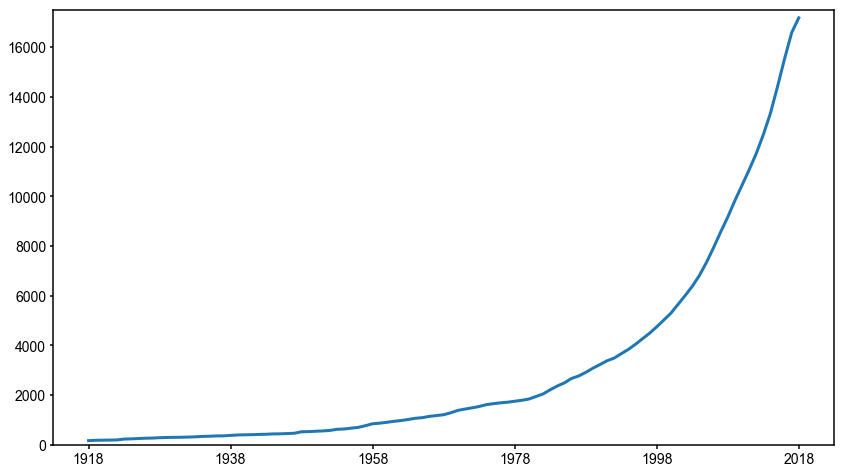

In [42]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from matplotlib import rcParams
import numpy as np

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig, ax = plt.subplots(figsize=(14,8))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#plt.xticks(contagem_sorted["Year"])
#plt.yticks(contagem_sorted["cum_sum"])
#ax.set_yscale('symlog')
plt.ylim(0,17500)

dim=np.arange(1918,2019,20)
plt.xticks(dim)

plt.plot(contagem_1918_2018["Year"], contagem_1918_2018["cum_sum"], linewidth=3)
fig.savefig("lpsn.svg")
plt.show()